# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
api_key = "654659f1f2b26f6057f08ff2553ad9c8"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Param
api_key = "654659f1f2b26f6057f08ff2553ad9c8"

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

#weatherpy = requests.get(url).json()
#print(weatherpy)


print("Beginning Data Retrieval     ")
print("-----------------------------")

counter = 0
city_info = []

for city in random.sample (cities, 550):
    
    city_url = url + "&q=" + city
    
    counter += 1
    print(f"Processing Record {counter} of Set 1| {city}")


    try:
        
        weatherpy = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = weatherpy["coord"]["lat"]
        city_lng = weatherpy["coord"]["lon"]
        city_max_temp = weatherpy["main"]["temp_max"]
        city_humidity = weatherpy["main"]["humidity"]
        city_clouds = weatherpy["clouds"]["all"]
        city_wind = weatherpy["wind"]["speed"]
        city_country = weatherpy["sys"]["country"]
        city_date = weatherpy["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_info.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City not found. Skipping...")
    pass

#print(json.dumps(weatherpy, indent=4, sort_keys=True))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1| kuche
City not found. Skipping...
Processing Record 2 of Set 1| abreus
Processing Record 3 of Set 1| taburi
City not found. Skipping...
Processing Record 4 of Set 1| san pedro
Processing Record 5 of Set 1| korla
City not found. Skipping...
Processing Record 6 of Set 1| abu samrah
Processing Record 7 of Set 1| jumla
Processing Record 8 of Set 1| hithadhoo
Processing Record 9 of Set 1| balkhash
Processing Record 10 of Set 1| awjilah
Processing Record 11 of Set 1| nedryhayliv
Processing Record 12 of Set 1| naantali
Processing Record 13 of Set 1| tasiilaq
Processing Record 14 of Set 1| esperance
Processing Record 15 of Set 1| wanaka
Processing Record 16 of Set 1| port macquarie
Processing Record 17 of Set 1| flinders
Processing Record 18 of Set 1| kolvereid
Processing Record 19 of Set 1| kaitangata
Processing Record 20 of Set 1| cape town
Processing Record 21 of Set 1| horsham
Processing Record 22 of 

Processing Record 182 of Set 1| jolalpan
Processing Record 183 of Set 1| vila do maio
Processing Record 184 of Set 1| puerto del rosario
Processing Record 185 of Set 1| port hedland
Processing Record 186 of Set 1| karimganj
Processing Record 187 of Set 1| espanola
Processing Record 188 of Set 1| geraldton
Processing Record 189 of Set 1| upernavik
Processing Record 190 of Set 1| aromashevo
Processing Record 191 of Set 1| weston
Processing Record 192 of Set 1| klang
Processing Record 193 of Set 1| bambanglipuro
Processing Record 194 of Set 1| amapa
Processing Record 195 of Set 1| lima
Processing Record 196 of Set 1| cayenne
Processing Record 197 of Set 1| longyearbyen
Processing Record 198 of Set 1| tauramena
Processing Record 199 of Set 1| baijiantan
Processing Record 200 of Set 1| amahai
Processing Record 201 of Set 1| norman wells
Processing Record 202 of Set 1| launceston
Processing Record 203 of Set 1| halalo
City not found. Skipping...
Processing Record 204 of Set 1| saskylakh
Proc

Processing Record 365 of Set 1| kropotkin
Processing Record 366 of Set 1| kavieng
Processing Record 367 of Set 1| agas
Processing Record 368 of Set 1| menongue
Processing Record 369 of Set 1| tortoli
Processing Record 370 of Set 1| nailsea
Processing Record 371 of Set 1| willowmore
Processing Record 372 of Set 1| zalesovo
Processing Record 373 of Set 1| puerto madero
Processing Record 374 of Set 1| port elizabeth
Processing Record 375 of Set 1| wajima
Processing Record 376 of Set 1| susanville
Processing Record 377 of Set 1| avarua
Processing Record 378 of Set 1| veraval
Processing Record 379 of Set 1| tongchuan
Processing Record 380 of Set 1| ko samui
Processing Record 381 of Set 1| vostok
Processing Record 382 of Set 1| santa cruz
Processing Record 383 of Set 1| vila velha
Processing Record 384 of Set 1| nyagan
Processing Record 385 of Set 1| muskegon
Processing Record 386 of Set 1| bourail
Processing Record 387 of Set 1| monterey
Processing Record 388 of Set 1| pangkalanbuun
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_data = pd.DataFrame(city_info)
#city_data

lats = city_data["Lat"]
max_temps = city_data["Max Temp"]
humidity = city_data["Humidity"]
cloudiness = city_data["Cloudiness"]
wind_speed = city_data["Wind Speed"]

city_data.to_csv(output_data_file, index_label="City_ID")
city_data.count()

City          490
Cloudiness    490
Country       490
Date          490
Humidity      490
Lat           490
Max Temp      490
Wind Speed    490
lng           490
dtype: int64

In [5]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Max Temp,Wind Speed,lng
0,abreus,100,CU,1567121012,94,22.28,77.00,23.04,-80.57
1,san pedro,44,AR,1567121012,59,-33.68,57.99,4.00,-59.66
2,abu samrah,0,SY,1567121013,54,35.30,74.68,9.01,37.18
3,jumla,80,NP,1567121013,90,29.28,52.00,3.04,82.18
4,hithadhoo,87,MV,1567120416,65,-0.60,82.78,7.09,73.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

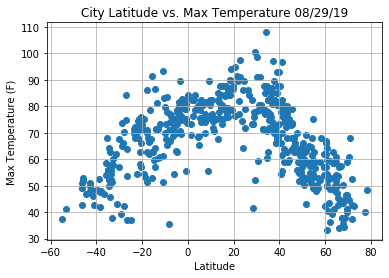

In [6]:
date = time.strftime("%D")

plt.scatter(lats, max_temps)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Max_temp.png")

plt.show()

#### Latitude vs. Humidity Plot

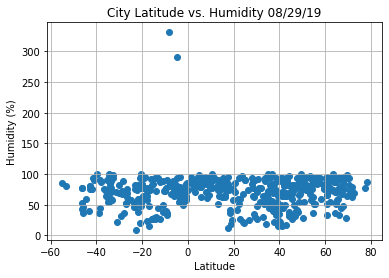

In [7]:
date = time.strftime("%D")

plt.scatter(lats, humidity)
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

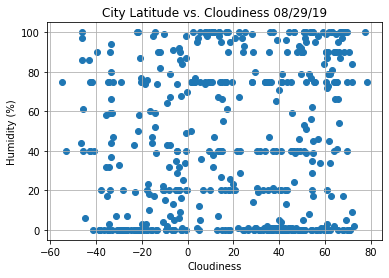

In [8]:
date = time.strftime("%D")

plt.scatter(lats, cloudiness)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Cloudiness")
plt.grid(True)

plt.savefig("cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

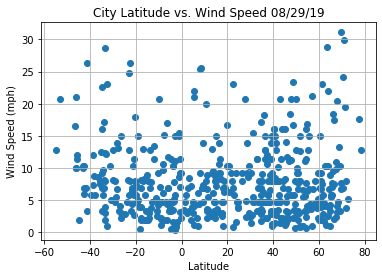

In [9]:
date = time.strftime("%D")

plt.scatter(lats, wind_speed)
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("wind_speed.png")

plt.show()